# Alzheimer's Disease Prediction

## Dataset Description
This dataset contains synthetic but realistic health and lifestyle data for 2,149 patients, with detailed information on demographics, medical history, clinical measurements, cognitive assessments, and Alzheimer's diagnosis status.

## Objective
The objective of this project is to develop a machine learning model capable of predicting whether a patient is diagnosed with Alzheimer's Disease based on their health, lifestyle, and cognitive characteristics.

## Type of Model
This will be a supervised learning task using a binary classification model (Diagnosis: 0 = No Alzheimer's, 1 = Alzheimer's).

GitHub Repo: https://github.com/alfogtz/Alzheimers-Disease-Prediction/tree/main

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset
df = pd.read_csv('https://raw.githubusercontent.com/alfogtz/Alzheimers-Disease-Prediction/refs/heads/main/alzheimers_disease_data.csv')
print("Shape of dataset:", df.shape)
df.head()

Shape of dataset: (2149, 35)


,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


# First Step: Data cleaning and EDA

In [3]:
# The column doctor in charge is useless for this project since all the values are confidential
if 'DoctorInCharge' in df.columns:
    df.drop(columns=['DoctorInCharge'], inplace=True)
print(df.columns.tolist())

['PatientID', 'Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'FamilyHistoryAlzheimers', 'CardiovascularDisease', 'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Confusion', 'Disorientation', 'PersonalityChanges', 'DifficultyCompletingTasks', 'Forgetfulness', 'Diagnosis']


In [4]:
#Checking if we have missing values
print("\nMissing values per column:")
print(df.isnull().sum())
df.describe()


Missing values per column:
PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyC

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,...,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,5825.000000,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,...,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,620.507185,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,...,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,4751.000000,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,...,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5288.000000,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,...,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5825.000000,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,...,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6362.000000,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,...,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,6899.000000,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,...,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Distribution of the Target

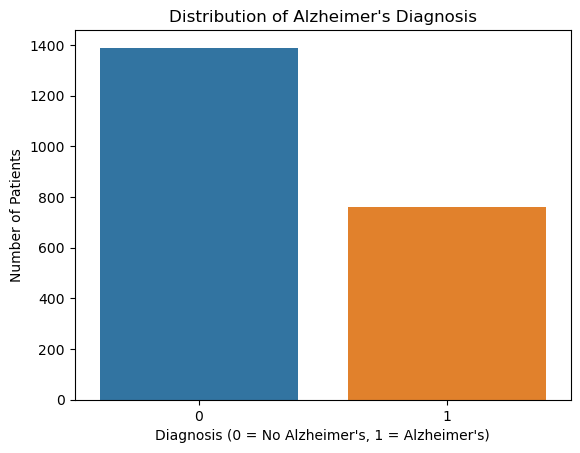

Diagnosis Distribution (%):
Diagnosis
0    64.634714
1    35.365286
Name: proportion, dtype: float64


In [6]:
sns.countplot(data=df, x='Diagnosis')
plt.title('Distribution of Alzheimer\'s Diagnosis')
plt.xlabel('Diagnosis (0 = No Alzheimer\'s, 1 = Alzheimer\'s)')
plt.ylabel('Number of Patients')
plt.show()

diagnosis_distribution = df['Diagnosis'].value_counts(normalize=True) * 100
print("Diagnosis Distribution (%):")
print(diagnosis_distribution)


The database has a 35.36% of positive dianosis, thar may seem like a lot if we were analyzing the entire population but this database is of people that visited the doctor to receive a diagnosis so it's a normal behavior.

## Age Distribution

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


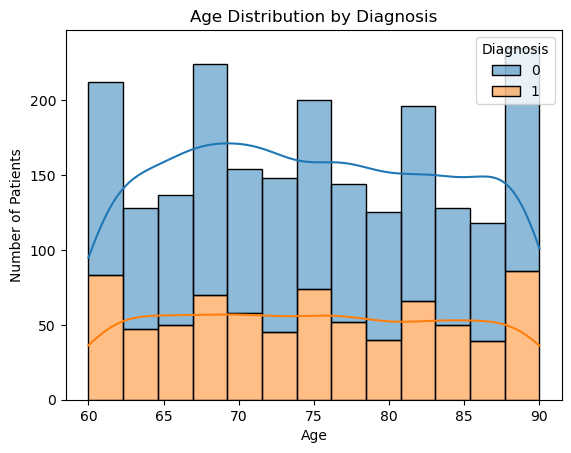

In [7]:
sns.histplot(data=df, x='Age', hue='Diagnosis', kde=True, multiple='stack')
plt.title('Age Distribution by Diagnosis')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.show()

It doesn't seem to be an important trend regarding age and diagnosis

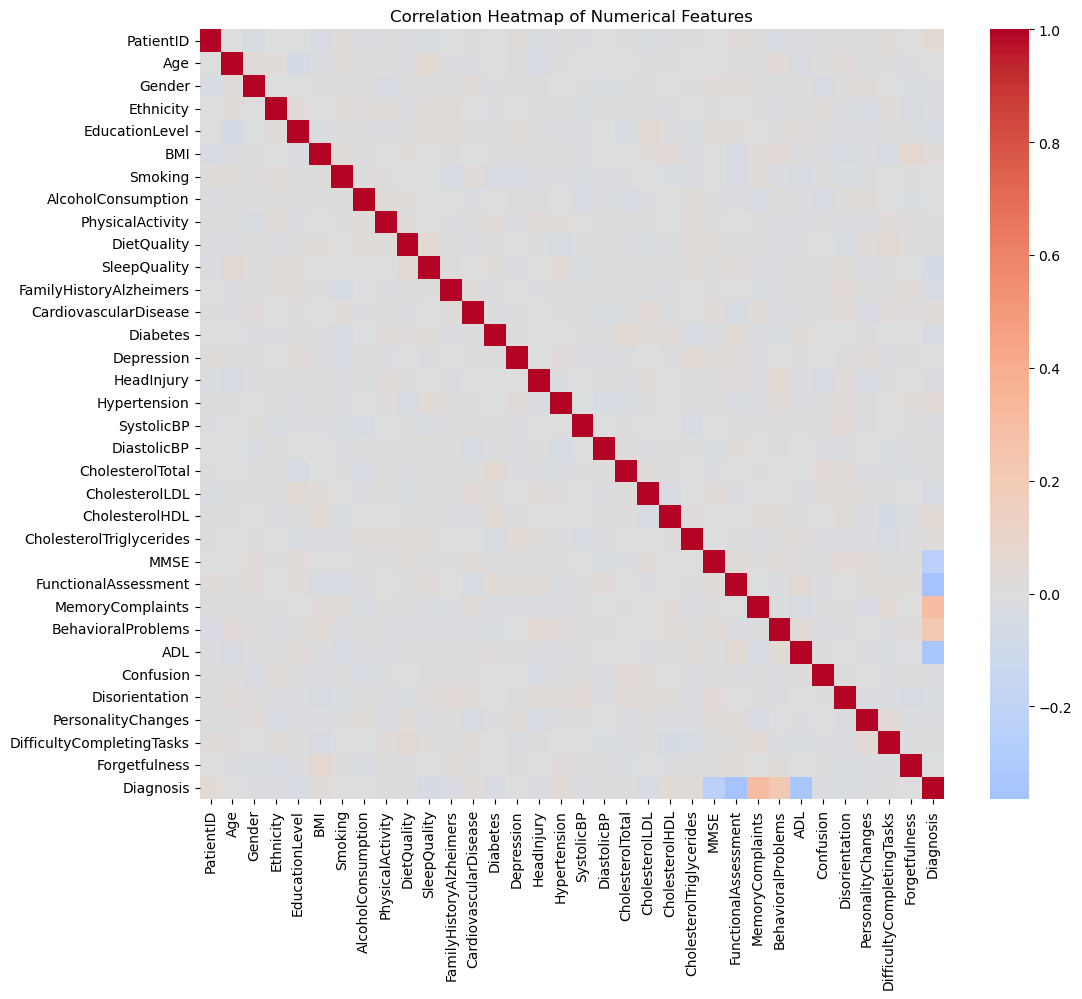

In [11]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

After seeing the heatmap, it looks like most of the variables are meaningless for predicting the presence of Alzheimer, except for MMSE, FunctionalAssesment, BehavioralProblems and ADL. So I'll create boxplots for those variables.

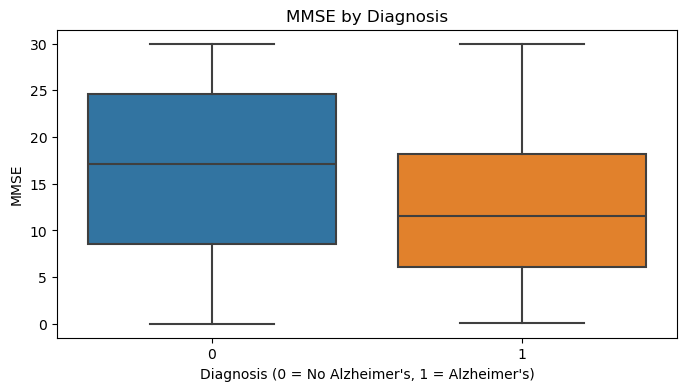

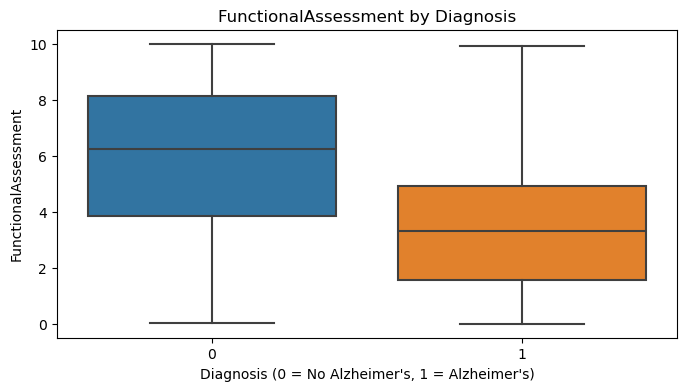

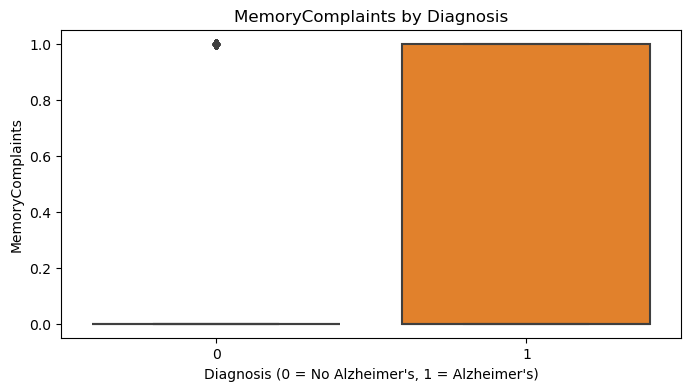

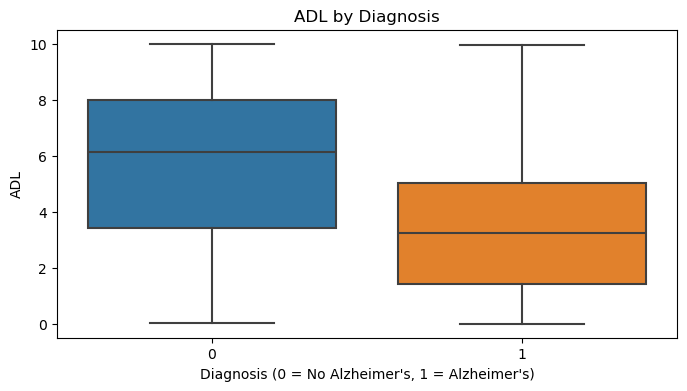

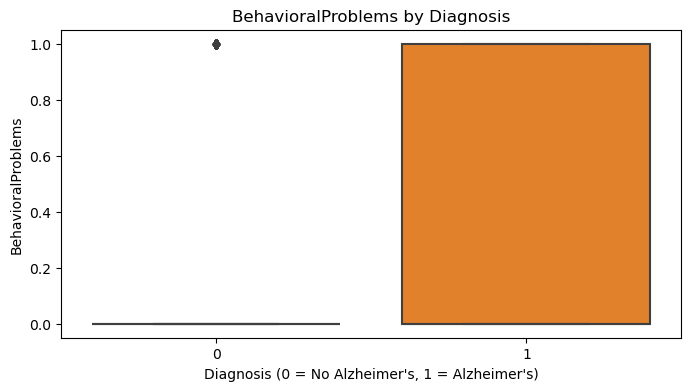

In [12]:
important_features = ['MMSE', 'FunctionalAssessment', 'MemoryComplaints','ADL', 'BehavioralProblems']

for feature in important_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x='Diagnosis', y=feature)
    plt.title(f'{feature} by Diagnosis')
    plt.xlabel('Diagnosis (0 = No Alzheimer\'s, 1 = Alzheimer\'s)')
    plt.ylabel(feature)
    plt.show()

## EDA Summary and Key Insights

- The dataset shows a positive Alzheimer's diagnosis rate of **35.3**. While this may seem high compared to the general population, it is consistent with the fact that this dataset includes only patients who visited a doctor for cognitive evaluation, leading to a higher proportion of diagnosed cases.
- Age does not show a strong or clear trend with Alzheimer's diagnosis in this dataset. The distribution of ages among diagnosed and non-diagnosed patients appears fairly similar.

- After reviewing the correlation heatmap, it is evident that most variables have very low correlation with the diagnosis outcome. Only a few features show meaningful relationships with Alzheimer's diagnosis:
  - MMSE (Mini-Mental State Examination)
  - Functional Assessment
  - Behavioral Problems
  - ADL (Activities of Daily Living)

- Based on these observations, detailed analysis (boxplots) will focus on these key features to better understand their relationship with Alzheimer's diagnosis.


# Data Preparation and Model Building

Even though our exploratory data analysis provided valuable insights into which variables might be good predictors, we will initially include all available variables (except Patient ID and Doctor In Charge) to fit a Logistic Regression model.

Variables with statistically significant p-values (p < 0.05) will be selected for the final modeling phase..

In [13]:
!pip install statsmodels
import statsmodels.api as sm

if 'PatientID' in df.columns:
    df.drop(columns=['PatientID'], inplace=True)

X = df.drop(columns=['Diagnosis'])
y = df['Diagnosis']

X_with_const = sm.add_constant(X)

logit_model = sm.Logit(y, X_with_const)
result = logit_model.fit()

print(result.summary())


Defaulting to user installation because normal site-packages is not writeable
Optimization terminated successfully.
         Current function value: 0.368112
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Diagnosis   No. Observations:                 2149
Model:                          Logit   Df Residuals:                     2116
Method:                           MLE   Df Model:                           32
Date:                Sat, 26 Apr 2025   Pseudo R-squ.:                  0.4334
Time:                        14:15:56   Log-Likelihood:                -791.07
converged:                       True   LL-Null:                       -1396.2
Covariance Type:            nonrobust   LLR p-value:                6.854e-234
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------


After analyzing the statistical significance of the variables, we will proceed using MMSE, FunctionalAssessment, MemoryComplaints, BehavioralProblems, ADL and CholesterolLDL (on the edge 0.05)

# Modeling and Evaluation

Based on statistical significance analysis, the final features selected for modeling are:
- MMSE (Mini-Mental State Examination)
- Functional Assessment
- Memory Complaints
- Behavioral Problems
- ADL (Activities of Daily Living)
- CholesterolLDL

These features showed strong predictive power for Alzheimer's diagnosis.
We will now train a Logistic Regression model using only these variables.

Accuracy: 0.8209302325581396
Precision: 0.7450980392156863
Recall: 0.75
F1-Score: 0.7475409836065574
ROC AUC: 0.8917550170390004


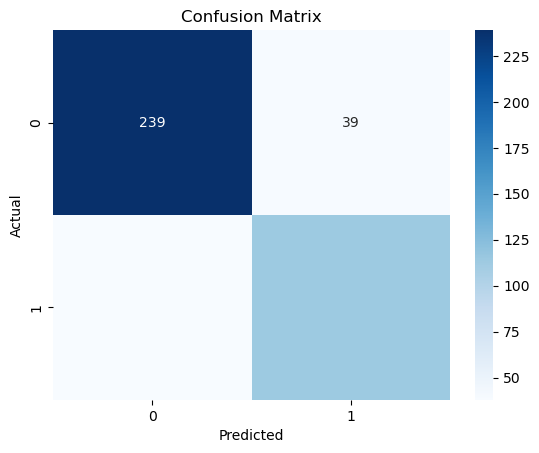

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

final_features = ['MMSE', 'FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems', 'ADL', 'CholesterolLDL']

X = df[final_features]
y = df['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
y_prob = logreg.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Logistic Regression Model Results

The Logistic Regression model using statistically selected features (MMSE, Functional Assessment, Memory Complaints, Behavioral Problems, ADL, and CholesterolLDL) achieved the following performance on the test set:

- Accuracy: 82.09%
- Precision: 74.5%
- Recall: 75.0%
- F1-Score: 74.7%
- ROC AUC: 89.17%

The confusion matrix shows good overall predictive capability, with a relatively balanced performance between sensitivity (recall) and precision. The model successfully identified a high proportion of actual Alzheimer's cases, which is critical for healthcare applications.

Overall, the model demonstrates strong predictive performance and confirms that cognitive and functional assessments are key predictors for Alzheimer's diagnosis.


# Random Forest Model

To compare the performance of a tree-based model, we will train a Random Forest Classifier using the same features selected previously.


Random Forest Accuracy: 0.9534883720930233
Random Forest Precision: 0.9459459459459459
Random Forest Recall: 0.9210526315789473
Random Forest F1-Score: 0.9333333333333332
Random Forest ROC AUC: 0.9467531238167362


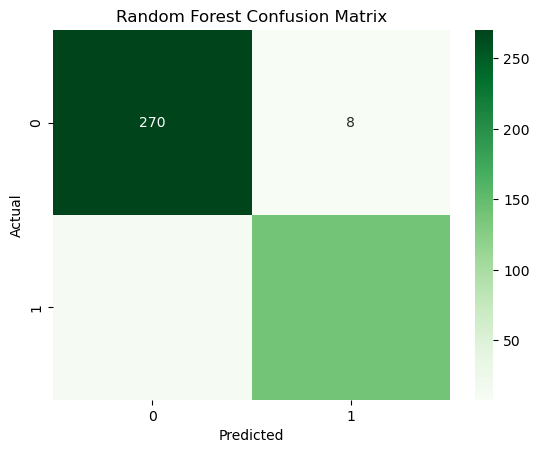

In [17]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Precision:", precision_score(y_test, y_pred_rf))
print("Random Forest Recall:", recall_score(y_test, y_pred_rf))
print("Random Forest F1-Score:", f1_score(y_test, y_pred_rf))
print("Random Forest ROC AUC:", roc_auc_score(y_test, y_prob_rf))

cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Model Comparison and Evaluation

Two models were trained and evaluated on the Alzheimer's Disease dataset:

| Model | Accuracy | Precision | Recall | F1-Score | ROC AUC |
|:---|:---|:---|:---|:---|:---|
| Logistic Regression | 82.09% | 74.5% | 75.0% | 74.7% | 89.17% |
| Random Forest | 95.35% | 94.59% | 92.11% | 93.33% | 94.67% |

**Key Observations:**
- Random Forest significantly outperforms Logistic Regression across all metrics.
- The Random Forest model achieves over 95% accuracy and 94% AUC, demonstrating excellent predictive performance.
- Logistic Regression, while simpler, still provided a strong baseline, correctly identifying a high proportion of cases.
- Given the critical nature of Alzheimer's prediction, Random Forest's higher recall is especially important to minimize false negatives.

**Final Model Selected:**  
Due to its superior performance, the Random Forest model is selected as the final predictive model for this project.


# Conclusions and Future Work

## Conclusions

In this project, we developed machine learning models to predict Alzheimer's Disease diagnosis based on health, cognitive, and lifestyle data.

Key findings include:
- Cognitive and functional assessments (MMSE, Functional Assessment, Memory Complaints, Behavioral Problems, and ADL scores) were the strongest predictors of Alzheimer's diagnosis.
- Demographic, lifestyle, and general health features (such as age, BMI, or cardiovascular diseases) did not show significant direct predictive power in this dataset.
- Logistic Regression achieved reasonable performance, with an accuracy of 82% and a ROC AUC of 89%.
- Random Forest significantly outperformed Logistic Regression, achieving an accuracy of 95%, recall of 92%, and a ROC AUC of 95%, making it the final selected model.

The Random Forest model demonstrated excellent ability to correctly classify Alzheimer's cases, minimizing both false positives and false negatives — a critical requirement for medical applications.

## Future Work

- Explore feature engineering techniques to create interaction variables (e.g., combining cognitive and lifestyle factors).
- Investigate more advanced models such as XGBoost or LightGBM for further performance improvements.
- Validate the model on external real-world datasets to assess generalization capability.
- Perform hyperparameter tuning on Random Forest to maximize performance further.
- Analyze model explainability using SHAP values or feature importance analysis to better understand which features drive predictions.

This project highlights the importance of cognitive and functional assessments in Alzheimer's prediction and demonstrates the potential of machine learning to support early diagnosis efforts.

GitHub Repo: https://github.com/alfogtz/Alzheimers-Disease-Prediction/tree/main

Dataset Cite
@misc{rabie_el_kharoua_2024,

title={Alzheimer's Disease Dataset},

url={https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset},

DOI={10.34740/KAGGLE/DSV/8668279},

publisher={Kaggle},

author={Rabie El Kharoua},

year={2024}

}